In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

In [2]:
def fast_fourier_transform(t,y):
    '''Return the fast Fourier transform of y.'''
    ŷ = np.fft.fft(y)
    ω = 2*np.pi*np.fft.fftfreq(len(time),time[1]-time[0])
    return ω,ŷ

In [3]:
I = 4
J = 8
F = 14

c = 10
b = 10
h = 1

dt = 0.0001
#t = np.arange(0,20,dt)

In [4]:
x = np.random.rand(I)
y = np.random.rand(J,I)
#print("x", x)
#print("y", y)
#print()

newx=[]
time=[0]
for ii in range(I):
    newx.append(x[ii])

for step in np.arange(0+dt,20,dt):
    time.append(step)
    dx = np.zeros((I))
    dy = np.zeros((J,I))

    for i in range(I):
        for j in range(J):

            dx[i] = (x[(i-1)%I] * (x[(i+1)%I] - x[(i-2)%I]) - x[i%I] + F - h*c/b*(np.sum([y[jj%J,i] for jj in range(J)])))*dt     
            dy[j,i] = (c*b*y[(j+1)%J,i]*(y[(j-1)%J,i]-y[(j+2)%J,i])-c*y[(j)%J,i]+h*c/b*x[i])*dt

            x[i]+= dx[i]
            y[j,i]+= dy[j,i]
            
        newx.append(x[i])
    
#print("final",newx)
x1 = newx[::I]
x2 = newx[1::I]
x3 = newx[2::I]
x4 = newx[3::I]
#print("x1",x1)
#print("x2",x2)
#print("x3",x3)

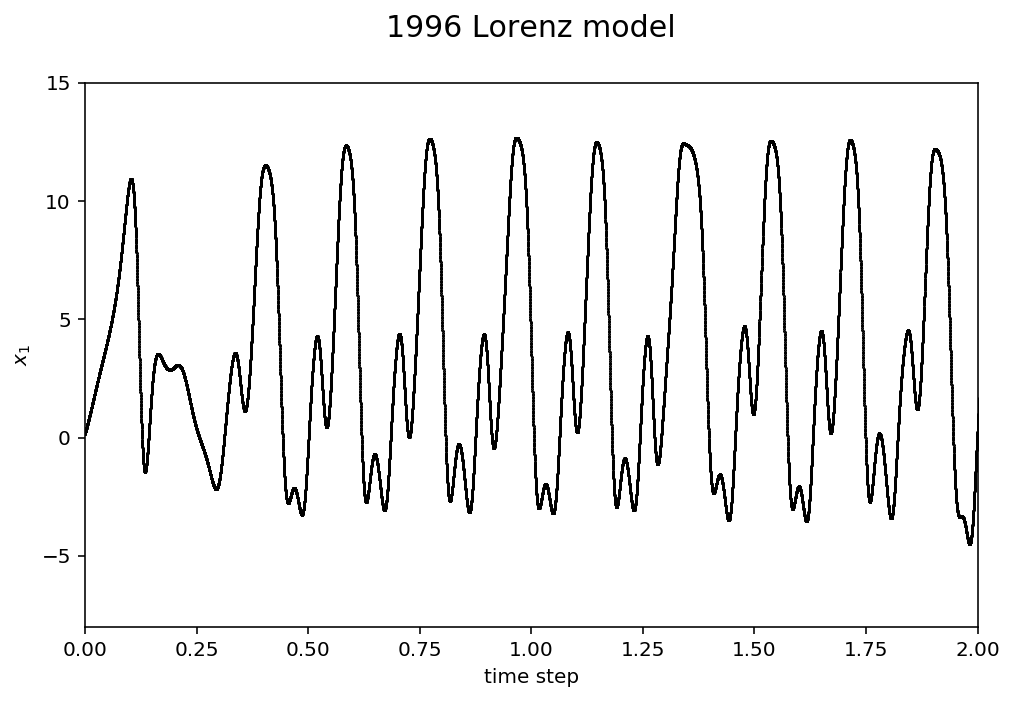

In [5]:
fig = plt.figure(figsize=(8,5))
plt.scatter(time,x1, s=1.0, marker='.', c='black')
plt.ylabel(r'$x_1$')
plt.xlabel('time step')
plt.title('1996 Lorenz model\n',fontsize=15)
plt.xlim(0,2)
plt.ylim(-8,15)
plt.show()

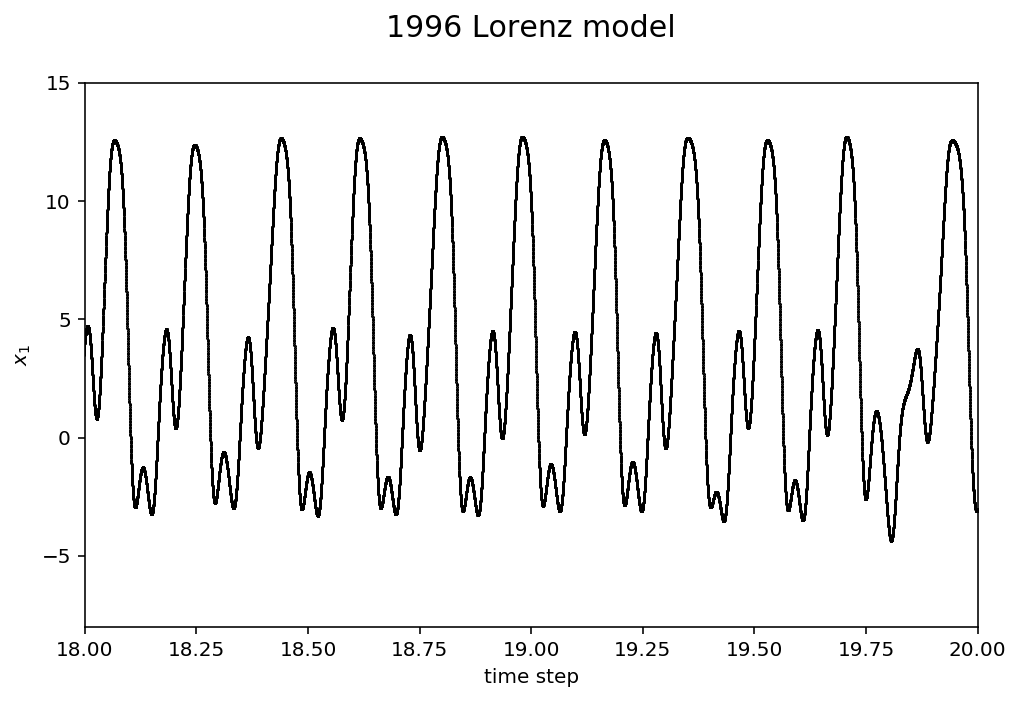

In [6]:
fig = plt.figure(figsize=(8,5))
plt.scatter(time[100000::],x1[100000::], s=1.0, marker='.', c='black')
plt.ylabel(r'$x_1$')
plt.xlabel('time step')
plt.title('1996 Lorenz model\n',fontsize=15)
plt.xlim(18,20)
plt.ylim(-8,15)
plt.show()

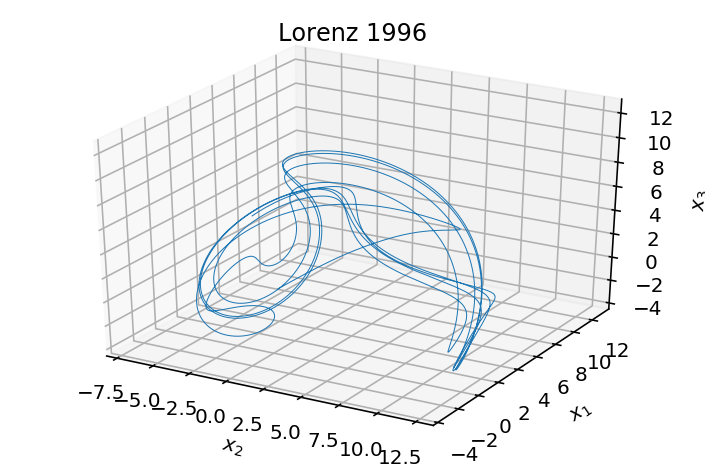

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x2[:10000], x1[:10000], x3[:10000],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996")
plt.show()

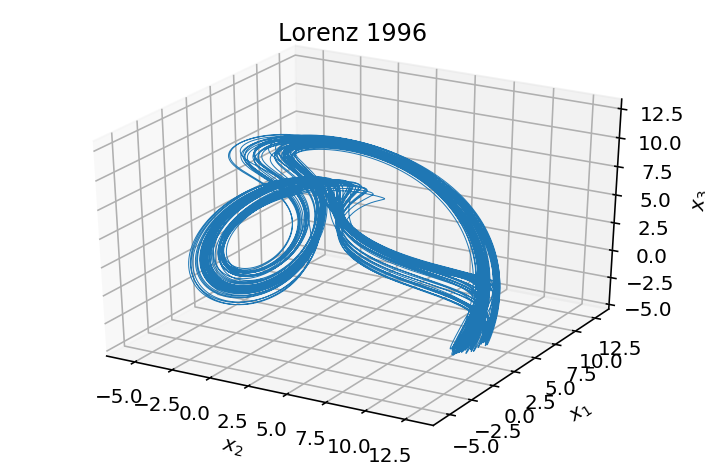

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x2[100000::], x1[100000::], x3[100000::],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996")
plt.show()

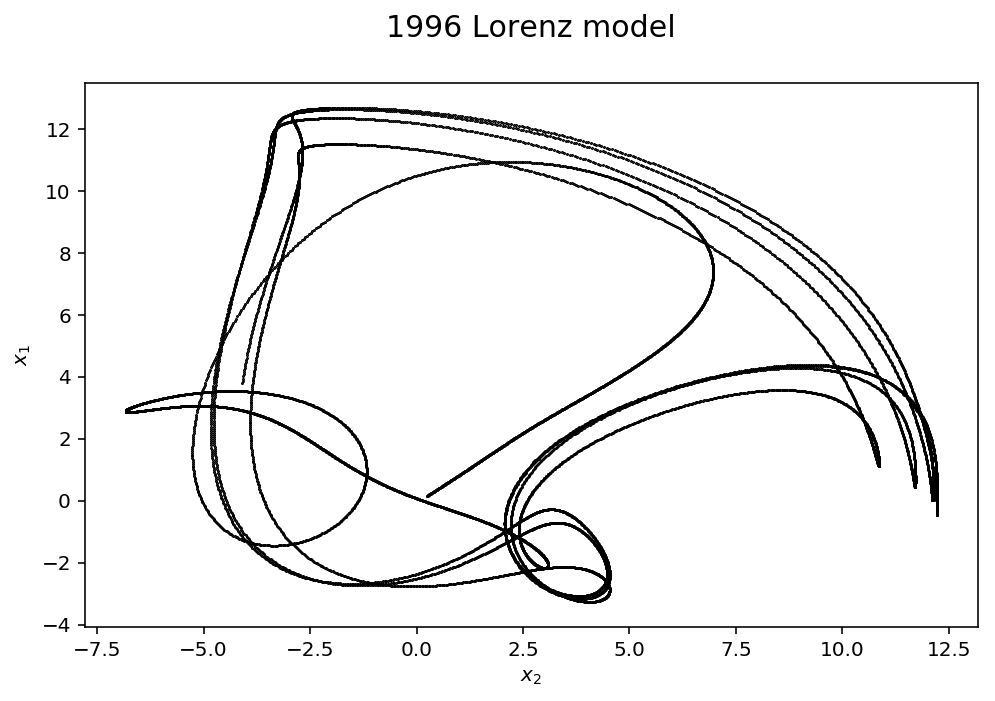

In [9]:
fig = plt.figure(figsize=(8,5))
plt.scatter(x2[:10000],x1[:10000], s=1.0, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_1$')
plt.xlabel(r'$x_2$')
plt.title('1996 Lorenz model\n',fontsize=15)
#plt.xlim(1,4)
#plt.ylim(0,1)
plt.show()

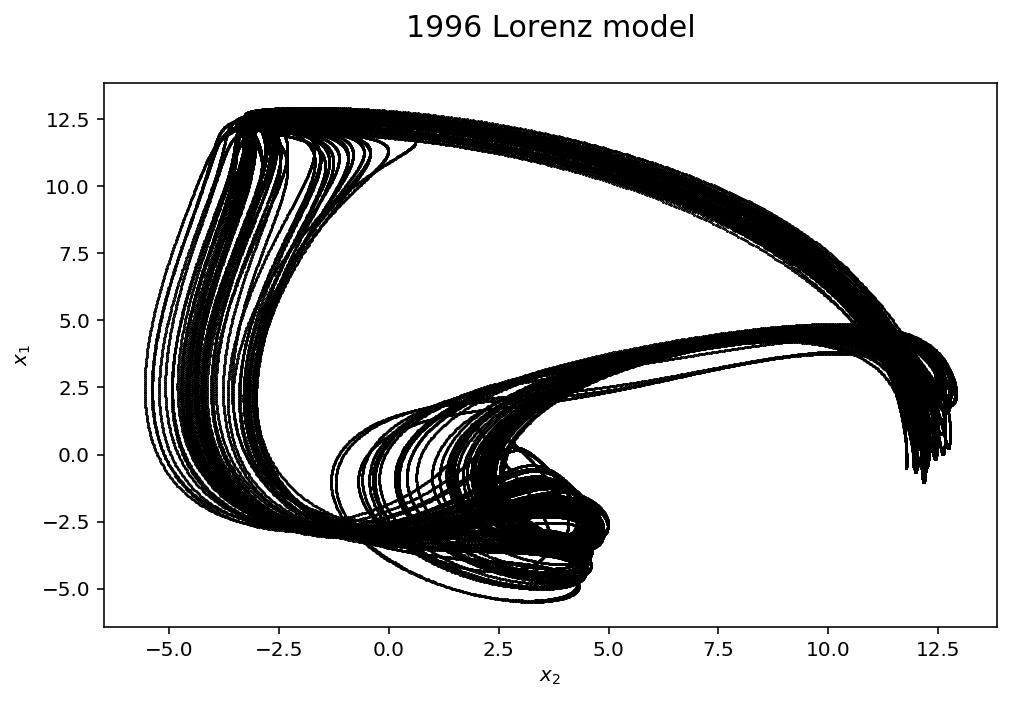

In [10]:
fig = plt.figure(figsize=(8,5))
plt.scatter(x2[100000::],x1[100000::], s=1.0, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_1$')
plt.xlabel(r'$x_2$')
plt.title('1996 Lorenz model\n',fontsize=15)
#plt.xlim(1,4)
#plt.ylim(0,1)
plt.show()

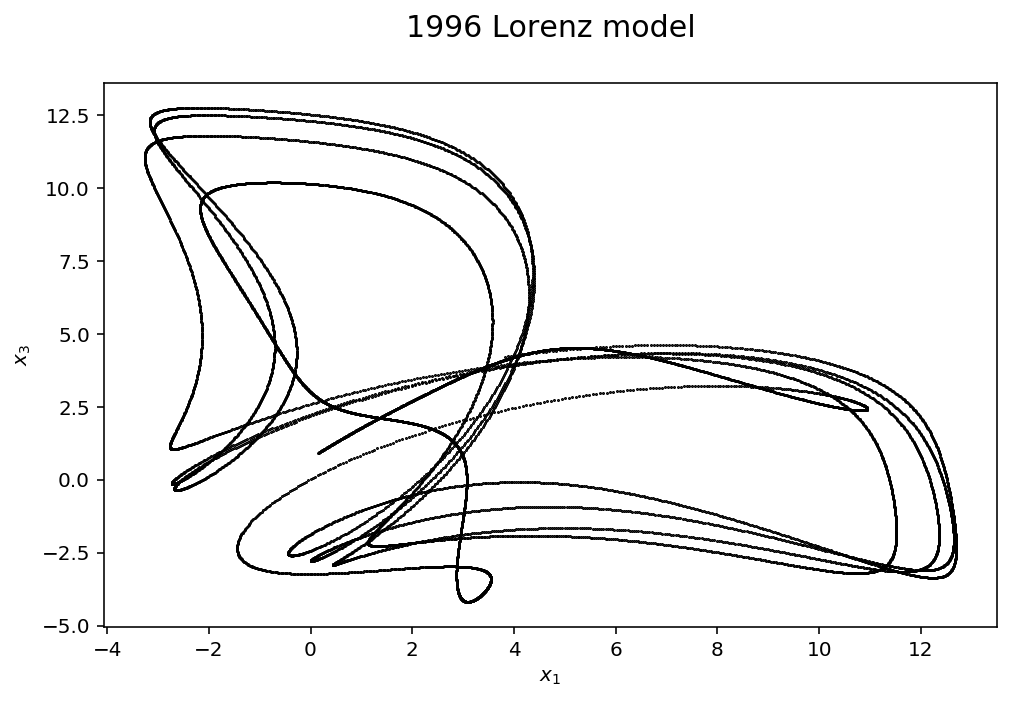

In [11]:
fig = plt.figure(figsize=(8,5))
plt.scatter(x1[:10000],x3[:10000], s=1.0, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_3$')
plt.xlabel(r'$x_1$')
plt.title('1996 Lorenz model\n',fontsize=15)
#plt.xlim(1,4)
#plt.ylim(0,1)
plt.show()

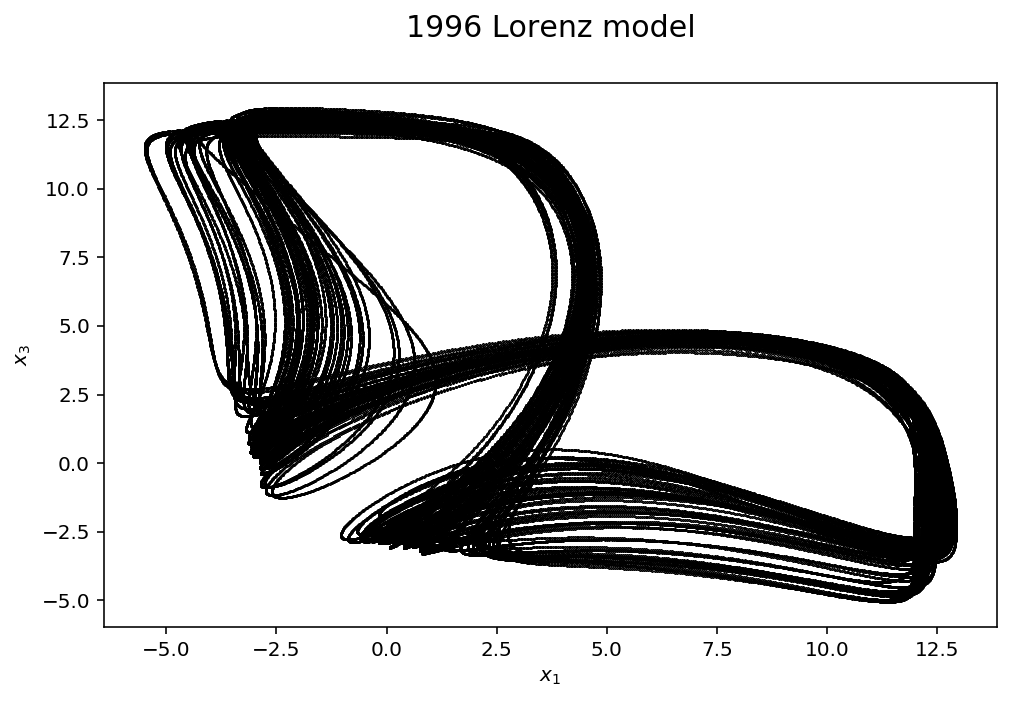

In [12]:
fig = plt.figure(figsize=(8,5))
plt.scatter(x1[100000::],x3[100000::], s=1.0, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_3$')
plt.xlabel(r'$x_1$')
plt.title('1996 Lorenz model\n',fontsize=15)
#plt.xlim(1,4)
#plt.ylim(0,1)
plt.show()

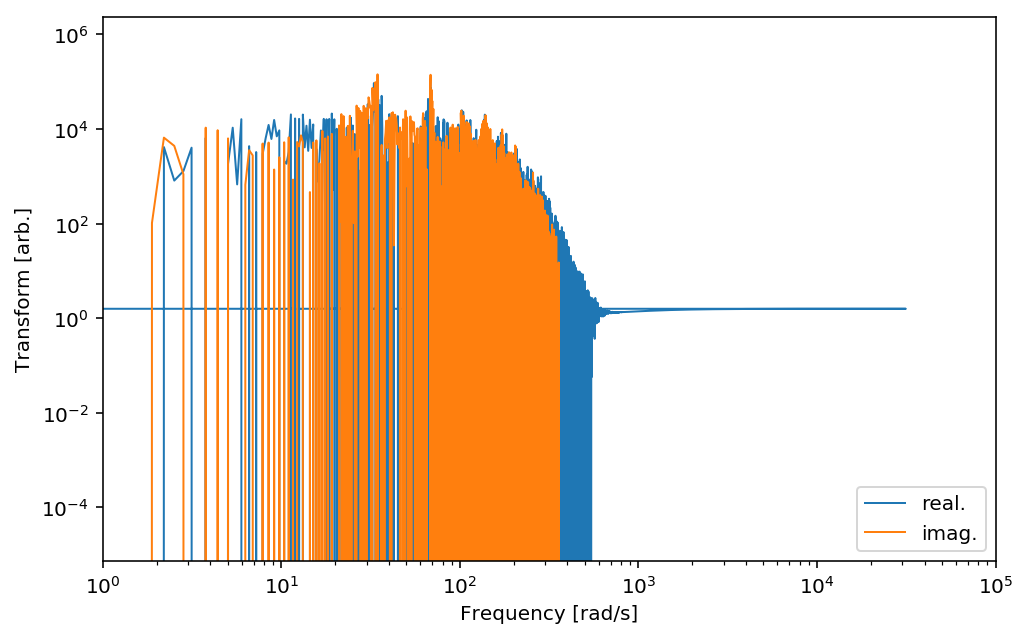

In [13]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)

# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,ŷ.real,label='real.',lw=1)
plt.loglog(ω,ŷ.imag,label='imag.',lw=1)
#plt.xlim(0,np.max(ω))
plt.xlim(1,10**5)
#plt.ylim(-100000,100000)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Transform [arb.]')
plt.legend(loc='lower right')

Text(0,0.5,'Power [arb]')

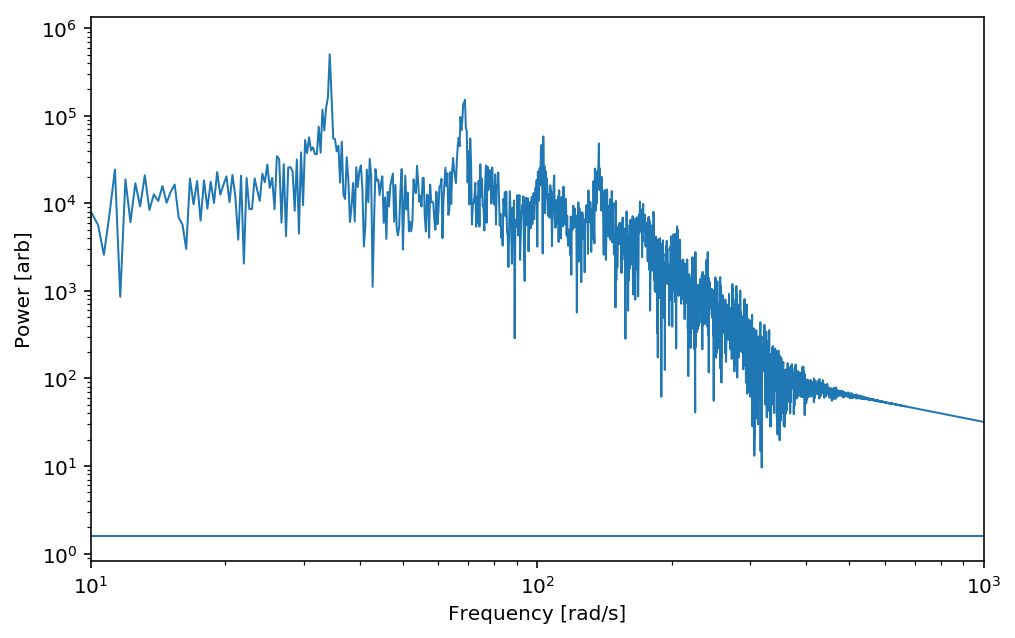

In [14]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)

# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,np.abs(ŷ),lw=1)
plt.xlim(10,10**3)
#plt.ylim(1,10**6)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Power [arb]')